# $k$-nearest neighors

---


## Nathan Karst

In [1]:
import pandas as pd
import seaborn as sns
import BabsonAnalytics
import numpy as np
%matplotlib inline

# Load

In [2]:
df = pd.read_csv('../data/BostonHousing.csv')

# Manage

In [3]:
df.CHAS = df.CHAS.astype("category")
df.drop('MEDV',axis=1,inplace=True)

df = df.select_dtypes(include=[np.number])
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,1


# Partition

In [25]:
train = df.sample(frac=0.8)
test = df.drop(train.index)

trainTarget = train.pop('CAT. MEDV')
testTarget = test.pop('CAT. MEDV')

# Build

In [26]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15)
model.fit(train,trainTarget)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

# Predict

In [27]:
predictions = model.predict(test)

# Evaluate


In [28]:
correct = predictions == testTarget
incorrect = predictions != testTarget
error_rate = sum(predictions != testTarget)/len(predictions)
bench_rate = BabsonAnalytics.benchmarkErrorRate(trainTarget,testTarget)

print('Error rate: ', error_rate)
print('Benchmark: ',bench_rate)

Error rate:  0.138613861386
Benchmark:  0.148514851485


In [34]:
cm = BabsonAnalytics.confusionMatrix(predictions,
  testTarget)
print(cm.to_latex())

\begin{tabular}{lrr}
\toprule
Observations &   0 &   1 \\
Predictions &     &     \\
\midrule
0           &  85 &  13 \\
1           &   1 &   2 \\
\bottomrule
\end{tabular}



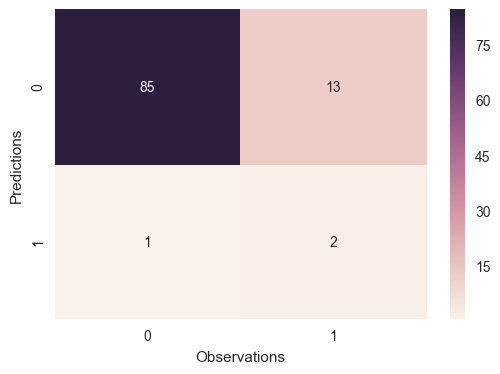

In [30]:
sns.heatmap(cm,annot=True)

# Normalization and standardization in pandas


In [10]:
train_normalized = (train - train.min())/(train.max() - train.min())
test_normalized = (test - test.min())/(test.max() - test.min())

train_standardized = (train - train.mean())/train.std()
test_standardized = (test - test.mean())/test.std()

# Normalization and standardization in sklearn


In [11]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
train_normalized = normalizer.fit_transform(train)
test_normalized = normalizer.fit_transform(test)

standardizer = preprocessing.StandardScaler()
train_standardized = standardizer.fit_transform(train)
test_standardized = standardizer.fit_transform(test)


In [12]:
model_normalized = neighbors.KNeighborsClassifier(n_neighbors=15)
model_normalized.fit(train_normalized,trainTarget)
predictions_normalized = model_normalized.predict(test_normalized)

error_rate_normalized = sum(predictions_normalized != testTarget)/len(predictions_normalized)
print('Error rate (normalized): ', error_rate_normalized)

Error rate (normalized):  0.128712871287


In [13]:
model_standardized = neighbors.KNeighborsClassifier(n_neighbors=15)
model_standardized.fit(train_standardized,trainTarget)
predictions_standardized = model_standardized.predict(test_standardized)

error_rate_standardized = sum(predictions_standardized != testTarget)/len(predictions_standardized)
print('Error rate (standardized): ', error_rate_standardized)

Error rate (standardized):  0.0891089108911
